# 1. Introduction

Nama : Erlangga Jayadipraja

Batch : SBY - 002

Dataset : [Australia Weather Data](https://www.kaggle.com/datasets/arunavakrchakraborty/australia-weather-data/data?select=Weather+Training+Data.csv)

Deployment : [HuggingFace](https://huggingface.co/spaces/ejayadipraja/p1m2)

Objective : Create a model to predict whether it will rain tomorrow or not in Australia

## Data Description

|**Column**|**Description**|**Legend**|
|:---:|:---:|:---:|
|Location|Name of the city from Australia||
|MinTemp|The Minimum temperature druing a particular day|Degree Celsius|
|MaxTemp|The Maximum temperature during a particular day|Degree Celsius|
|Rainfall|Rainfall during a particular day|Milimeters|
|Evaporation|Evaporation during a particular day|Milimeters|
|Sunshine|Bright sunshine during a particular day|Hours|
|WindGustDir|The direction of the strongest gust during a particular day|16 compass point|
|WindGustSpeed|Speed of strongest gust during a particular day|Kilometers per hour|
|WindDir9am|The direction of the wind for 10 min prior to 9 am|Compass point|
|WindDir3pm|The direction of the wind for 10 min prior to 3 pm|Compass point|
|WindSpeed9am|Speed of the wind for 10 min prior to 9 am|Kilometers per hour|
|WindSpeed3pm|Speed of the wind for 10 min prior to 3 pm|Kilometers per hour|
|Humidity9am|The humidity of the wind at 9 am|Percent|
|Humidity3pm|The humidity of the wind at 3 pm|Percent|
|Pressure9am|Atmospheric pressure at 9 am|Hectopascals|
|Pressure3pm|Atmospheric pressure at 3 pm|Hectopascals|
|Cloud9am|Cloud-obscured portions of the sky at 9 am|Eighths|
|Cloud3pm|Cloud-obscured portions of the sky at 3 pm|Eighths|
|Temp9am|The temperature at 9 am|Degree Celsius|
|Temp3pm|The temperature at 3 pm|Degree Celsius|
|RainToday|If today is rainy the 'Yes'. If today is not rainy then 'No'||
|RainTomorrow|If tomorrow is rainy then 1 (Yes). If tomorrow is not rainy then 0 (No)||

# 2. Import Libraries

In [69]:
# Calculate number
import pandas as pd
import numpy as np
from scipy import stats

# Visualozation
import matplotlib.pyplot as plt
import seaborn as sns

# Handling Outlier
from feature_engine.outliers import Winsorizer

# Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,f1_score, accuracy_score,precision_score,recall_score,make_scorer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


# Model Saving
import pickle

# Time
import time

# Suppress All Warnings
import warnings
warnings.filterwarnings('ignore')

# 3. Data Loading

In [70]:
# Data Load
df_ori = pd.read_csv('Weather_Data.csv')

In [71]:
# Just in case there is original data
df = df_ori.copy()

In [72]:
# To display all column
pd.set_option('display.max_columns', None)

In [73]:
# Show top 10 data
df.head(10)

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0
5,Row5,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0
6,Row6,Albury,13.4,30.4,0.0,NaN,NaN,N,30.0,SSE,ESE,17.0,6.0,48.0,22.0,1011.8,1008.7,NaN,NaN,20.4,28.8,No,1
7,Row7,Albury,15.9,21.7,2.2,NaN,NaN,NNE,31.0,NE,ENE,15.0,13.0,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,1
8,Row8,Albury,12.6,21.0,3.6,NaN,NaN,SW,44.0,W,SSW,24.0,20.0,65.0,43.0,1001.2,1001.8,NaN,7.0,15.8,19.8,Yes,0
9,Row9,Albury,9.8,27.7,NaN,NaN,NaN,WNW,50.0,NaN,WNW,NaN,22.0,50.0,28.0,1013.4,1010.3,0.0,NaN,17.3,26.2,NaN,0


In [74]:
# Show bottom 10 data
df.tail(10)

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
99506,Row101811,Uluru,3.2,18.6,0.0,NaN,NaN,E,46.0,ESE,E,15.0,20.0,56.0,29.0,1031.0,1027.2,NaN,NaN,8.2,17.4,No,0
99507,Row101812,Uluru,5.1,19.7,0.0,NaN,NaN,E,46.0,ESE,E,13.0,17.0,56.0,29.0,1028.5,1025.8,NaN,NaN,8.5,19.2,No,0
99508,Row101813,Uluru,2.5,21.2,0.0,NaN,NaN,ENE,35.0,ESE,E,17.0,19.0,57.0,32.0,1027.2,1023.0,NaN,NaN,10.3,20.3,No,0
99509,Row101814,Uluru,5.2,24.3,0.0,NaN,NaN,E,24.0,SE,E,11.0,11.0,53.0,24.0,1023.8,1020.0,NaN,NaN,12.3,23.3,No,0
99510,Row101815,Uluru,6.4,23.4,0.0,NaN,NaN,ESE,31.0,S,ESE,15.0,17.0,53.0,25.0,1025.8,1023.0,NaN,NaN,11.2,23.1,No,0
99511,Row101816,Uluru,8.0,20.7,0.0,NaN,NaN,ESE,41.0,SE,E,19.0,26.0,56.0,32.0,1028.1,1024.3,NaN,7.0,11.6,20.0,No,0
99512,Row101817,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0
99513,Row101818,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0
99514,Row101819,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0
99515,Row101820,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0


In [75]:
# Show data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         99516 non-null  object 
 1   Location       99516 non-null  object 
 2   MinTemp        99073 non-null  float64
 3   MaxTemp        99286 non-null  float64
 4   Rainfall       98537 non-null  float64
 5   Evaporation    56985 non-null  float64
 6   Sunshine       52199 non-null  float64
 7   WindGustDir    92995 non-null  object 
 8   WindGustSpeed  93036 non-null  float64
 9   WindDir9am     92510 non-null  object 
 10  WindDir3pm     96868 non-null  object 
 11  WindSpeed9am   98581 non-null  float64
 12  WindSpeed3pm   97681 non-null  float64
 13  Humidity9am    98283 non-null  float64
 14  Humidity3pm    97010 non-null  float64
 15  Pressure9am    89768 non-null  float64
 16  Pressure3pm    89780 non-null  float64
 17  Cloud9am       61944 non-null  float64
 18  Cloud3

In [76]:
# Show number of unique values for each columns
df.nunique()

row ID           99516
Location            49
MinTemp            386
MaxTemp            500
Rainfall           601
Evaporation        327
Sunshine           145
WindGustDir         16
WindGustSpeed       67
WindDir9am          16
WindDir3pm          16
WindSpeed9am        43
WindSpeed3pm        44
Humidity9am        101
Humidity3pm        101
Pressure9am        536
Pressure3pm        536
Cloud9am            10
Cloud3pm            10
Temp9am            432
Temp3pm            491
RainToday            2
RainTomorrow         2
dtype: int64

In [77]:
# Show columns name
df.columns

Index(['row ID', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [78]:
# Cheking Missing Value
df.isna().sum()

row ID               0
Location             0
MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        7006
WindDir3pm        2648
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday          979
RainTomorrow         0
dtype: int64

In [79]:
# Dropping Missing Value
df.dropna(axis=0 , inplace=True)

Remove the missing value because missing values are very many and will affect when looking for correlations between column, so they must be removed instead of inputing a values because it can damage the existing data

In [80]:
# Check Again Missing Value
df.isna().sum()

row ID           0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [81]:
# Check Duplicated data
df.duplicated().sum()

0

# 4. Exploratory Data Analysis (EDA)

In [82]:
df

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
4183,Row4262,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,0
4185,Row4264,Cobar,27.1,36.1,0.0,13.0,0.0,N,43.0,N,WNW,7.0,20.0,26.0,19.0,1007.7,1007.4,8.0,8.0,30.7,34.3,No,0
4186,Row4265,Cobar,23.3,34.0,0.0,9.8,12.6,SSW,41.0,S,SSE,17.0,19.0,33.0,15.0,1011.3,1009.9,3.0,1.0,25.0,31.5,No,0
4187,Row4266,Cobar,16.1,34.2,0.0,14.6,13.2,SE,37.0,SE,S,15.0,6.0,25.0,9.0,1013.3,1009.2,1.0,1.0,20.7,32.8,No,0
4188,Row4267,Cobar,19.0,35.5,0.0,12.0,12.3,ENE,48.0,ENE,WSW,30.0,9.0,46.0,28.0,1008.3,1004.0,1.0,5.0,23.4,33.3,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97406,Row99657,Darwin,21.9,33.0,0.0,5.2,10.9,E,44.0,SE,ENE,15.0,19.0,43.0,28.0,1014.6,1010.6,1.0,1.0,25.1,32.7,No,0
97407,Row99658,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,0
97408,Row99659,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,0
97409,Row99660,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,0


## 4.1 - EDA Target

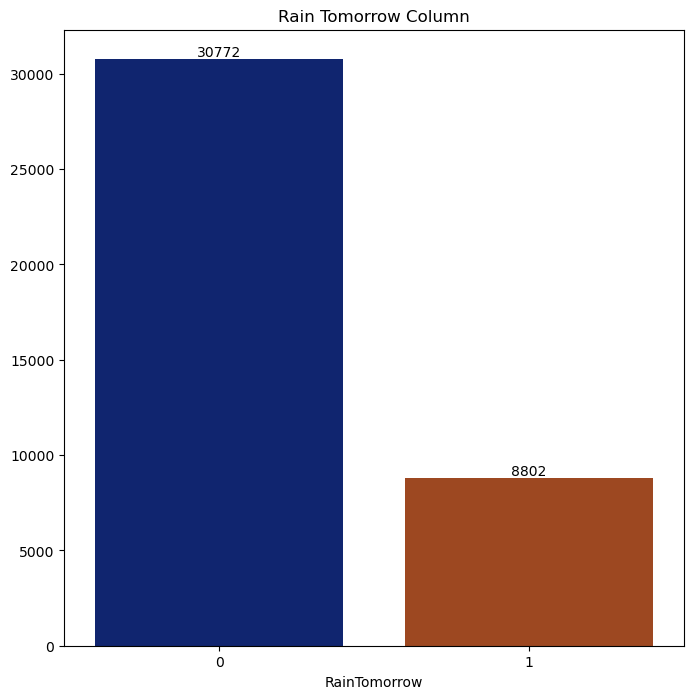

In [83]:
rain_tomorrow = df['RainTomorrow'].value_counts()

# Create barplot Visualization
plt.figure(figsize=(8,8))
ax = sns.barplot(x=rain_tomorrow.index, y=rain_tomorrow.values, palette='dark')
ax.bar_label(ax.containers[0]);
plt.title('Rain Tomorrow Column')

# Show the plot
plt.show()

`Details`:
 - 1 = `Yes`
 - 2 = `No`

From the plot above, it can be seen that the distribution of the 'RainTomorrow' or target columns data is more than half to `0` data. And the distribution of the data slightly balance.

## 4.2 - EDA Numeric

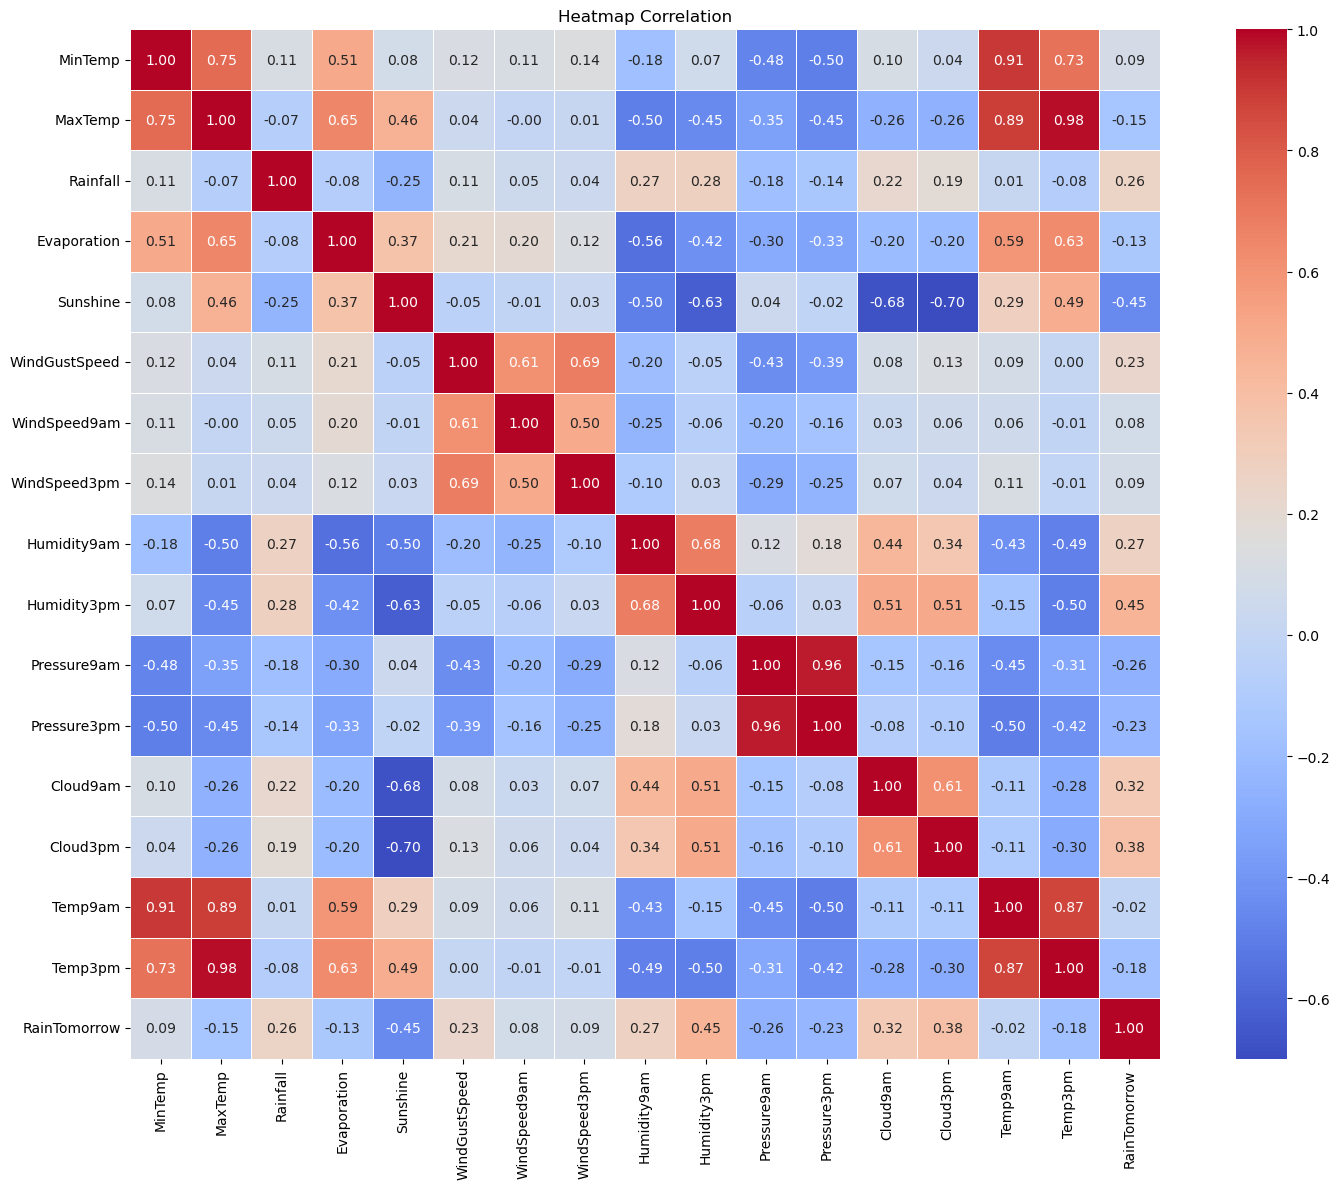

In [84]:
# Select numeric columns and target column
numerical_columns = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainTomorrow']
df_numerical_columns = df[numerical_columns]

# Create Heatmap Visualization
fig, ax= plt.subplots(figsize=[16,12])
corr = df_numerical_columns.corr()
sns.heatmap(corr, annot= True, fmt=".2f",cmap='coolwarm', linewidths=.5)
ax.set_aspect('equal')
plt.title('Heatmap Correlation')
plt.tight_layout()

# Show the plot
plt.show()

Columns with correlation less then 0.1 :
- MinTemp
- WindSpeed9am
- WindSpeed3pm
- Temp9am

## 4.3 - EDA Categorical

### 4.3.1 - 'Location' Column

In [85]:
corr_tau, pval_k = stats.kendalltau(df['Location'], df['RainTomorrow'])   # Kendall (tau)
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")  # Kendall (tau)

tau-correlation: -0.01, p-value: 0.1993612653267628


There is a correlation between those columns

### 4.3.2 - 'WindDir9am' Column

In [86]:
corr_tau, pval_k = stats.kendalltau(df['WindDir9am'], df['RainTomorrow'])   # Kendall (tau)
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")  # Kendall (tau)

tau-correlation: 0.03, p-value: 6.613076909015621e-12


There is a correlation between those columns

### 4.3.3 - 'WindDir3pm' Column

In [87]:
corr_tau, pval_k = stats.kendalltau(df['WindDir3pm'], df['RainTomorrow'])   # Kendall (tau)
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")  # Kendall (tau)

tau-correlation: 0.03, p-value: 1.7662146725871298e-09


There is a correlation between those columns

### 4.3.4 - 'RainToday' Column

In [88]:
corr_tau, pval_k = stats.kendalltau(df['RainToday'], df['RainTomorrow'])   # Kendall (tau)
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")  # Kendall (tau)

tau-correlation: 0.31, p-value: 0.0


There is a correlation between those columns

### 4.3.4 - 'WindGusDir' Column

In [89]:
corr_tau, pval_k = stats.kendalltau(df['WindGustDir'], df['RainTomorrow'])   # Kendall (tau)
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")  # Kendall (tau)

tau-correlation: 0.05, p-value: 2.9736080381710674e-36


There is a correlation between those columns

# 5. Feature Engineering

## 5.1 - Feature Selection

In [90]:
# Dropping Columns
df.drop(['row ID','MinTemp','WindSpeed9am','WindSpeed3pm','Temp9am'],axis=1, inplace=True)

Dropping columns because it has no correlation to the target column

## 5.2 - Split Feature (X) and Target (y)

In [91]:
X = df.drop(['RainTomorrow'], axis= 1)
y = df['RainTomorrow']

display(X)
display(y)

,Location,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday
4183,Cobar,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,20.0,13.0,1006.3,1004.4,2.0,5.0,33.4,No
4185,Cobar,36.1,0.0,13.0,0.0,N,43.0,N,WNW,26.0,19.0,1007.7,1007.4,8.0,8.0,34.3,No
4186,Cobar,34.0,0.0,9.8,12.6,SSW,41.0,S,SSE,33.0,15.0,1011.3,1009.9,3.0,1.0,31.5,No
4187,Cobar,34.2,0.0,14.6,13.2,SE,37.0,SE,S,25.0,9.0,1013.3,1009.2,1.0,1.0,32.8,No
4188,Cobar,35.5,0.0,12.0,12.3,ENE,48.0,ENE,WSW,46.0,28.0,1008.3,1004.0,1.0,5.0,33.3,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97406,Darwin,33.0,0.0,5.2,10.9,E,44.0,SE,ENE,43.0,28.0,1014.6,1010.6,1.0,1.0,32.7,No
97407,Darwin,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,63.0,32.0,1013.9,1010.5,0.0,1.0,32.3,No
97408,Darwin,32.6,0.0,7.6,8.6,E,37.0,SE,SE,56.0,28.0,1014.6,1011.2,7.0,0.0,32.0,No
97409,Darwin,32.8,0.0,5.6,11.0,E,33.0,E,W,46.0,23.0,1015.3,1011.8,0.0,0.0,32.1,No


4183     0
4185     0
4186     0
4187     0
4188     0
        ..
97406    0
97407    0
97408    0
97409    0
97410    0
Name: RainTomorrow, Length: 39574, dtype: int64

## 5.3 - Split between Train-set and Test-set

In [92]:
# Split Train-Set & Test-set for Feature (X) & Target (y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state= 14)

# Show shape of Feature (X) in Train-set & Test-set
print('Train size: ', X_train.shape)
print('Test size: ', X_test.shape)

# Show shape of Target (y) in Train-set & Test-set
print('Train size: ', y_train.shape)
print('Test size: ', y_test.shape)

Train size:  (31659, 17)
Test size:  (7915, 17)
Train size:  (31659,)
Test size:  (7915,)


## 6.4 - Data Handling

### 6.4.1 - Handling Outlier

In [93]:
print('Distribution of column `MaxTemp` : ', X_train['MaxTemp'].skew())
print('Distribution of column `Rainfall` : ', X_train['Rainfall'].skew())
print('Distribution of column `Evaporation` : ', X_train['Evaporation'].skew())
print('Distribution of column `Sunshine` : ', X_train['Sunshine'].skew())
print('Distribution of column `WindGustSpeed` : ', X_train['WindGustSpeed'].skew())
print('Distribution of column `Humidity9am` : ', X_train['Humidity9am'].skew())
print('Distribution of column `Humidity3pm` : ', X_train['Humidity3pm'].skew())
print('Distribution of column `Pressure9am` : ', X_train['Pressure9am'].skew())
print('Distribution of column `Pressure3pm` : ', X_train['Pressure3pm'].skew())
print('Distribution of column `Cloud9am` : ', X_train['Cloud9am'].skew())
print('Distribution of column `Cloud3pm` : ', X_train['Cloud3pm'].skew())
print('Distribution of column `Temp3pm` : ', X_train['Temp3pm'].skew())

Distribution of column `MaxTemp` :  0.18837528161608127
Distribution of column `Rainfall` :  7.228669148641586
Distribution of column `Evaporation` :  2.1246849097152354
Distribution of column `Sunshine` :  -0.5474097943492374
Distribution of column `WindGustSpeed` :  0.9245032101037077
Distribution of column `Humidity9am` :  -0.4878716287811003
Distribution of column `Humidity3pm` :  0.0042586284855005065
Distribution of column `Pressure9am` :  -0.061395682395342564
Distribution of column `Pressure3pm` :  0.01305785844233537
Distribution of column `Cloud9am` :  -0.17247119051215695
Distribution of column `Cloud3pm` :  -0.19441635197801643
Distribution of column `Temp3pm` :  0.1980596853084314


Because the majority of features are `skewed` (Only 1 Column is normal distribution), I will handle outlier with capping method and use `IQR`.

In [94]:
# Function to create histogram and boxplot.

def diagnostic_plots(X_train, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=X_train[variable])
    plt.title('Boxplot')

    plt.show()

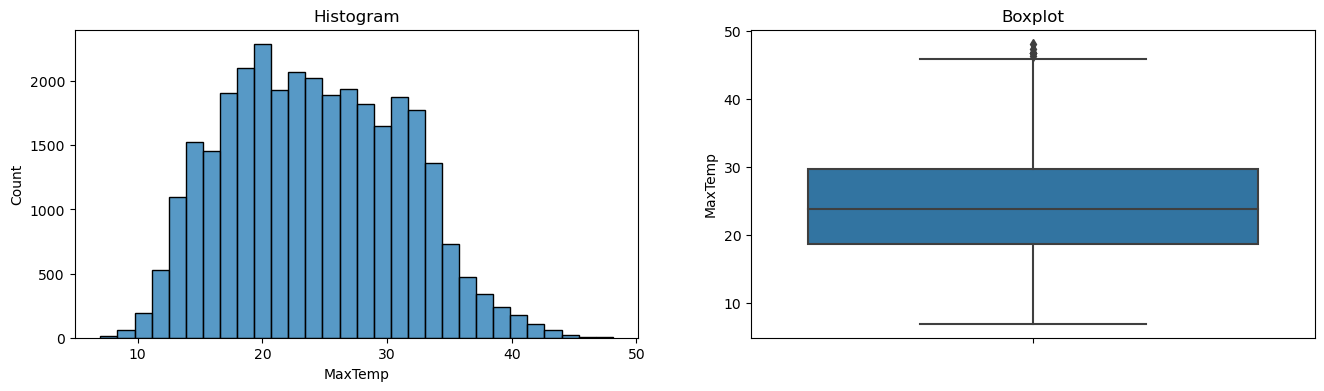

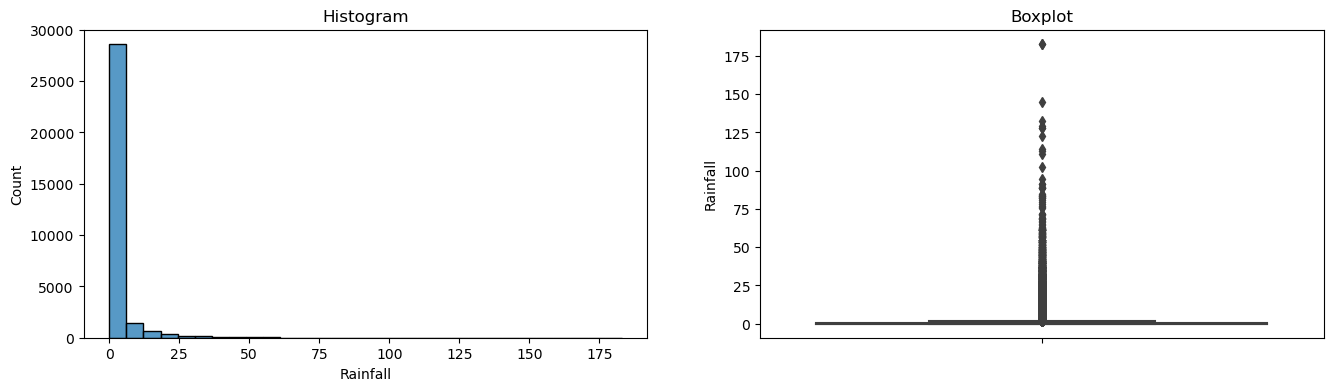

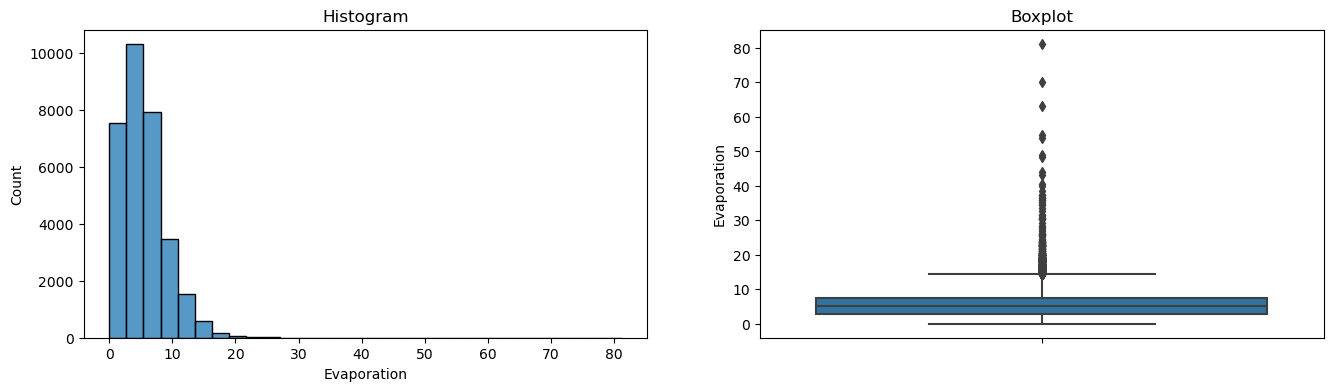

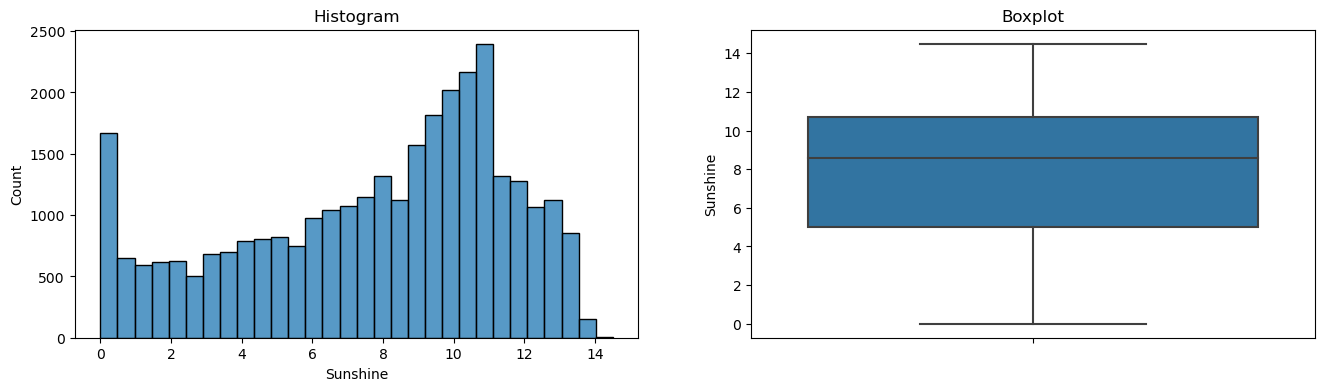

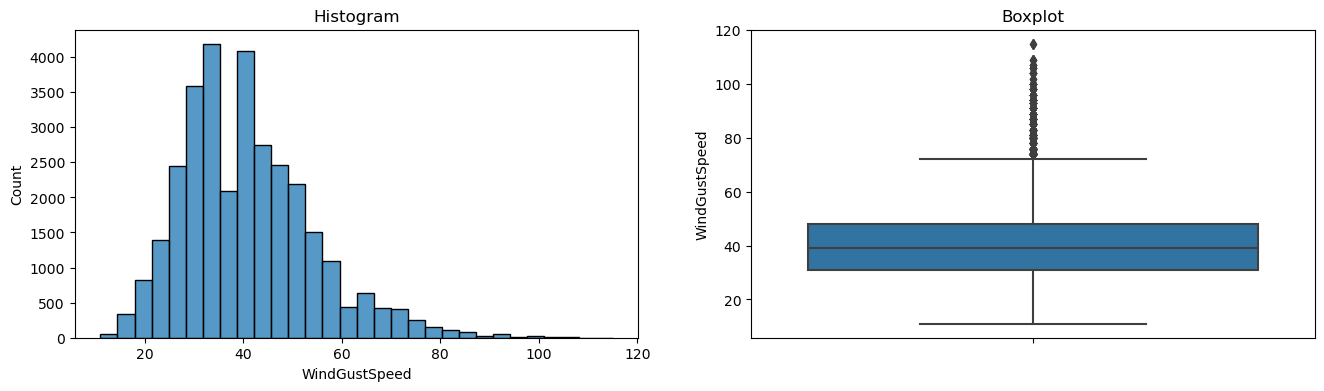

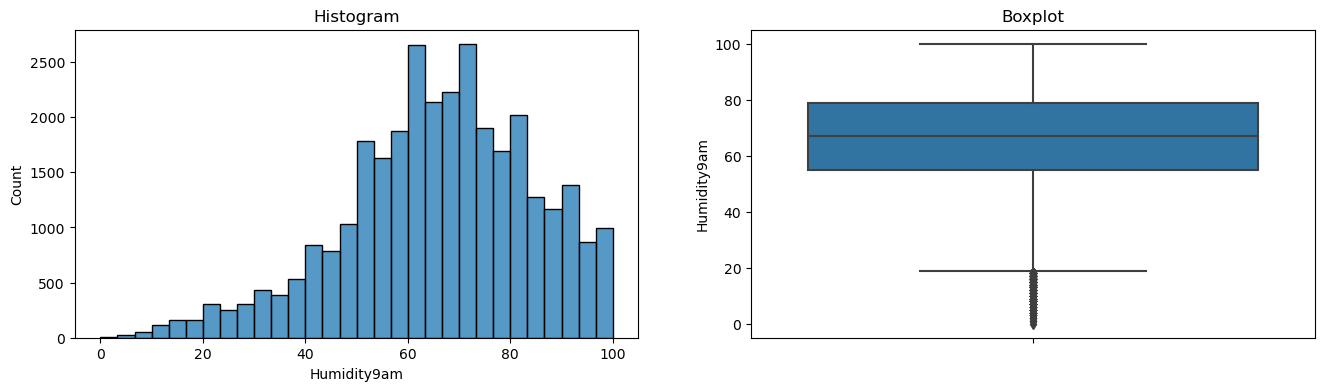

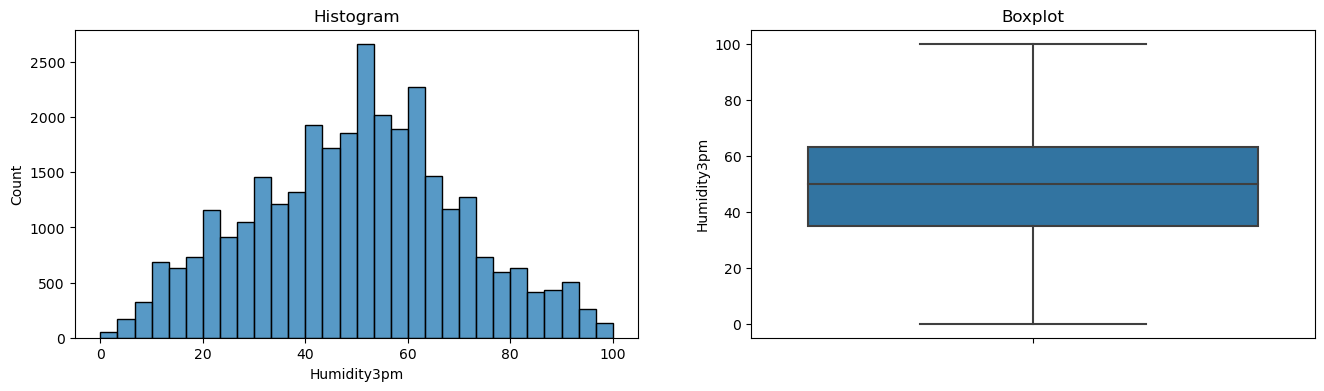

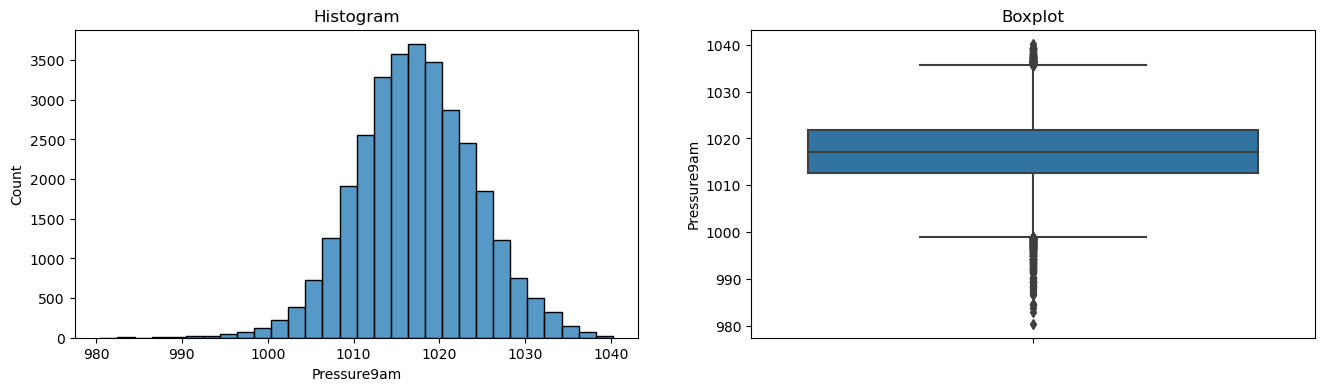

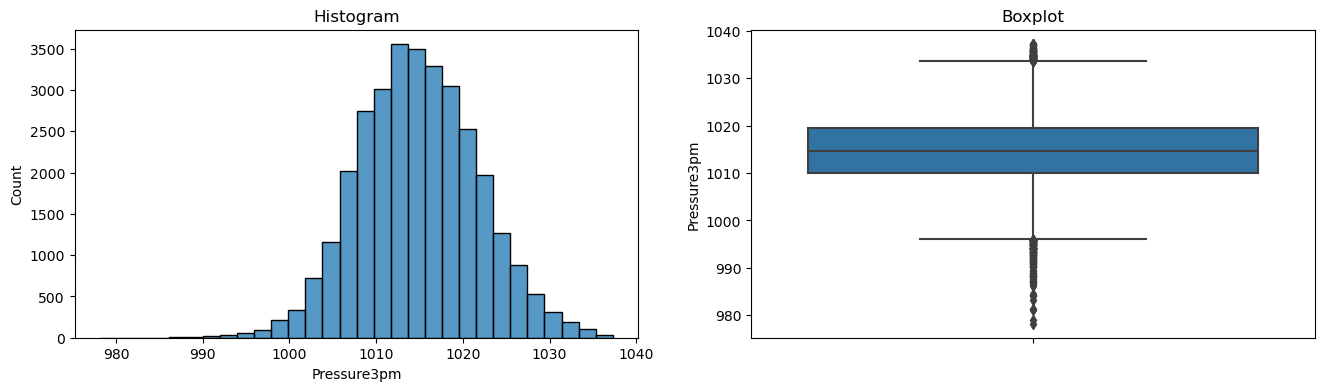

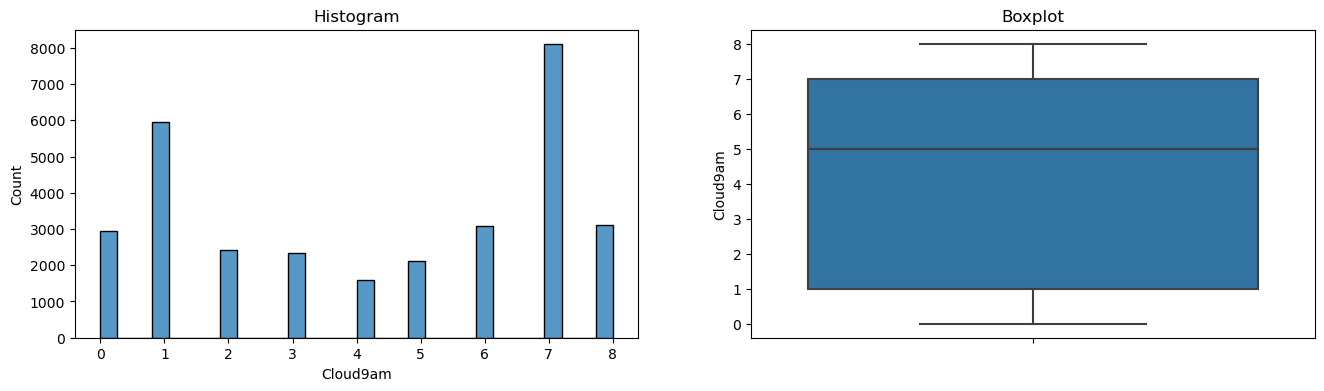

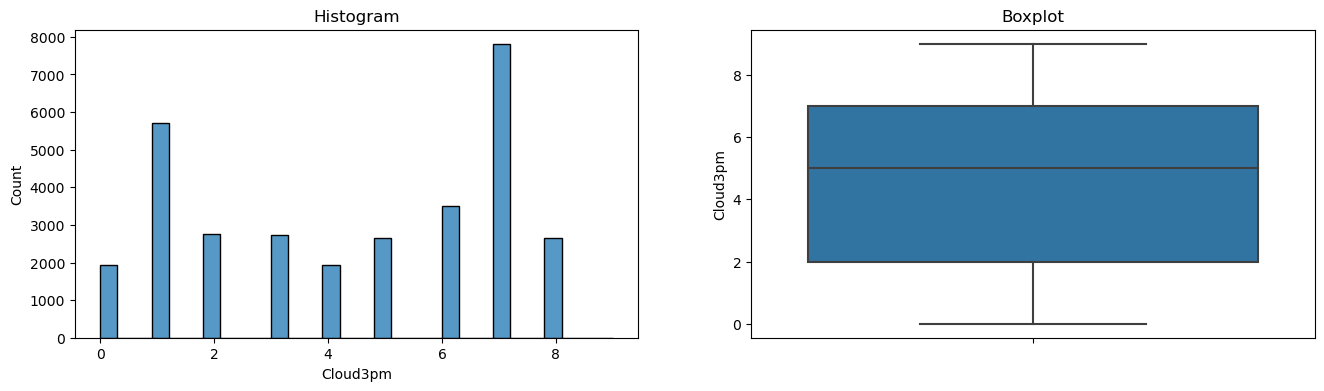

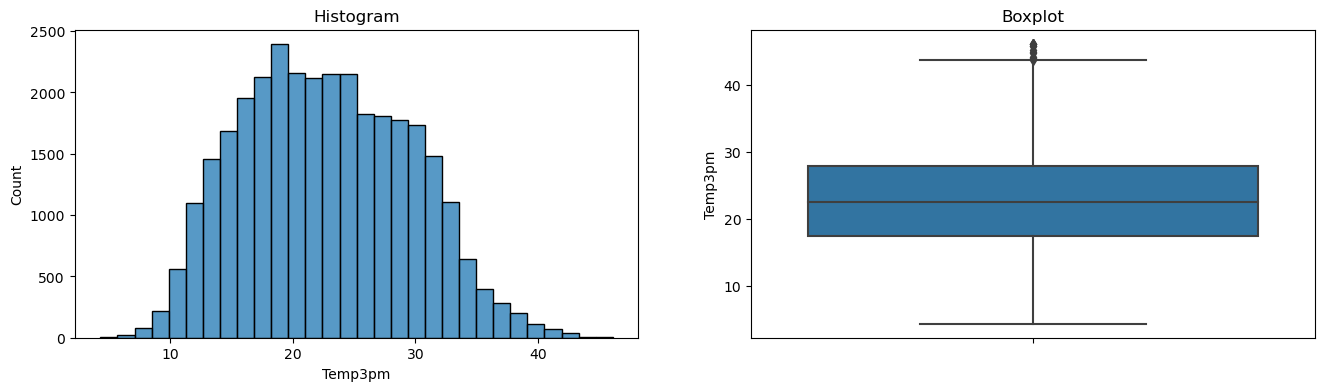

In [95]:
# Visualize skewed distribution using boxplot

diagnostic_plots(X_train, 'MaxTemp')
diagnostic_plots(X_train, 'Rainfall')
diagnostic_plots(X_train, 'Evaporation')
diagnostic_plots(X_train, 'Sunshine')
diagnostic_plots(X_train, 'WindGustSpeed')
diagnostic_plots(X_train, 'Humidity9am')
diagnostic_plots(X_train, 'Humidity3pm')
diagnostic_plots(X_train, 'Pressure9am')
diagnostic_plots(X_train, 'Pressure3pm')
diagnostic_plots(X_train, 'Cloud9am')
diagnostic_plots(X_train, 'Cloud3pm')
diagnostic_plots(X_train, 'Temp3pm')

**Using Winsorizer, capping_method 'iqr because the majority of data is `skewed`**

In [96]:
# Handling skew distribution Outlier 
winsoriser_skew = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=3,
                             variables=(['MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                                        'WindGustSpeed', 'Humidity9am','Humidity3pm',
                                        'Pressure9am','Pressure3pm', 'Cloud9am', 'Cloud3pm',
                                        'Temp3pm'
                                        ]))

X_train_capped = winsoriser_skew.fit_transform(X_train)
X_test_capped = winsoriser_skew.transform(X_test)

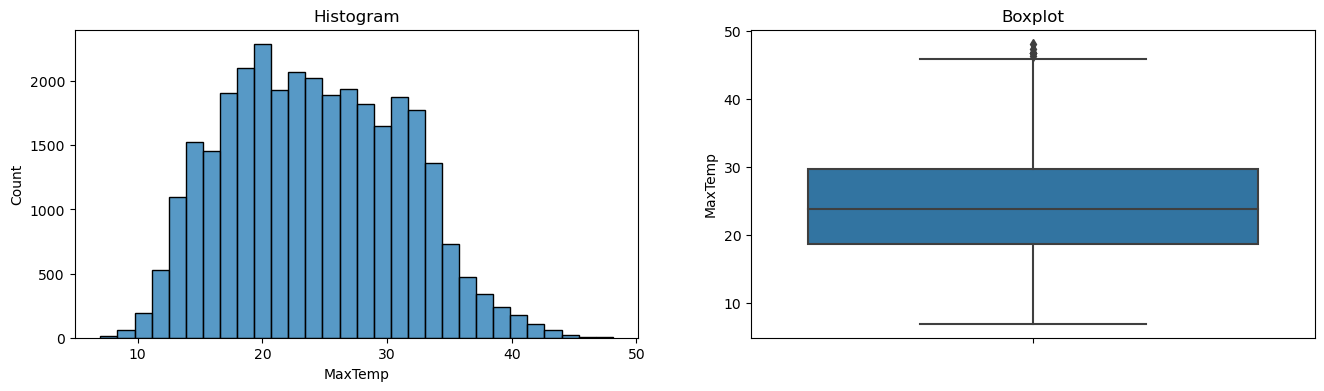

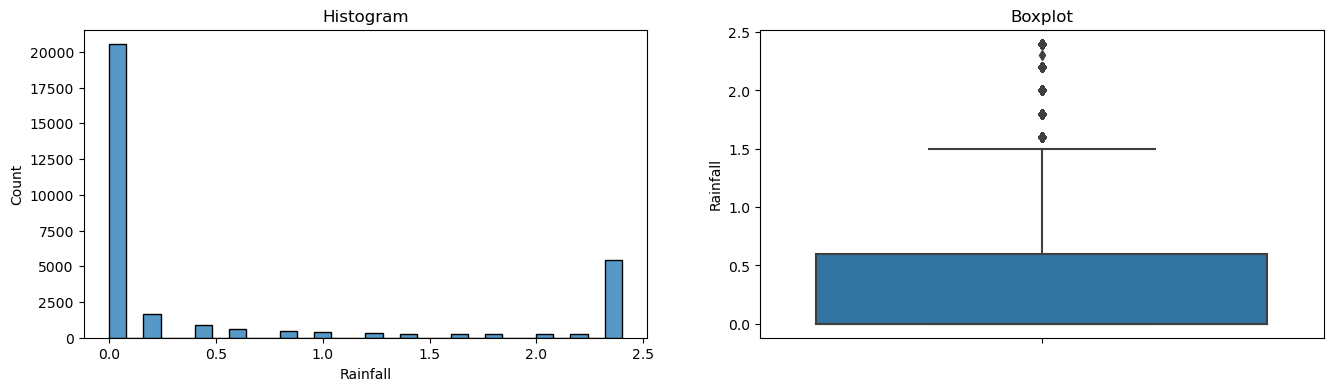

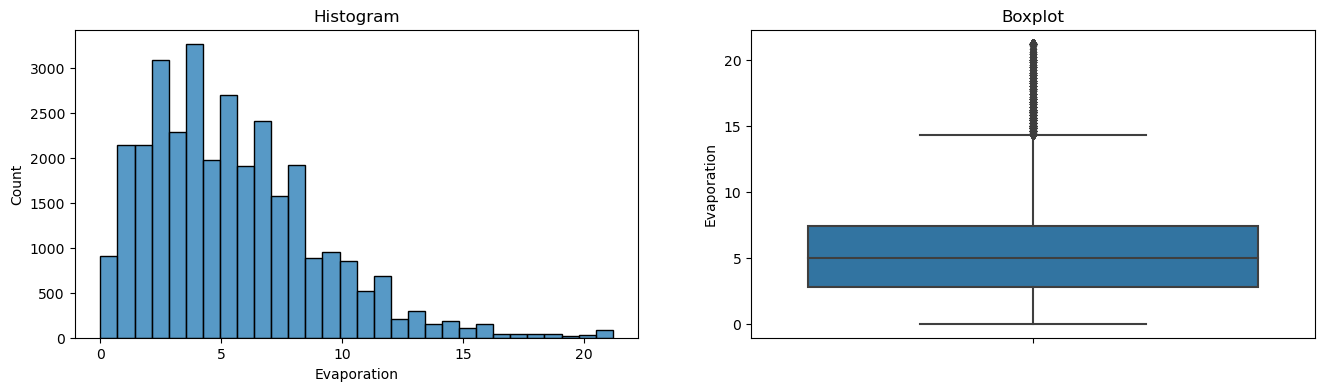

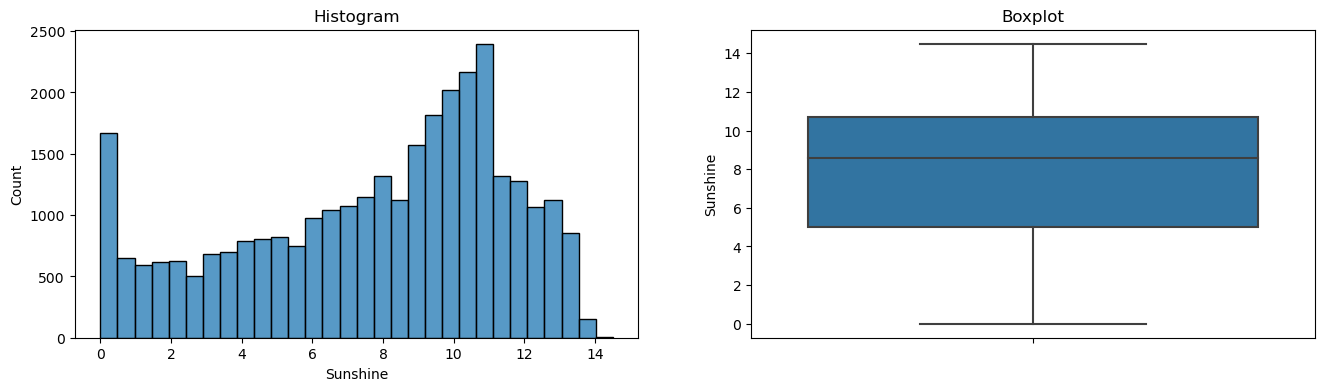

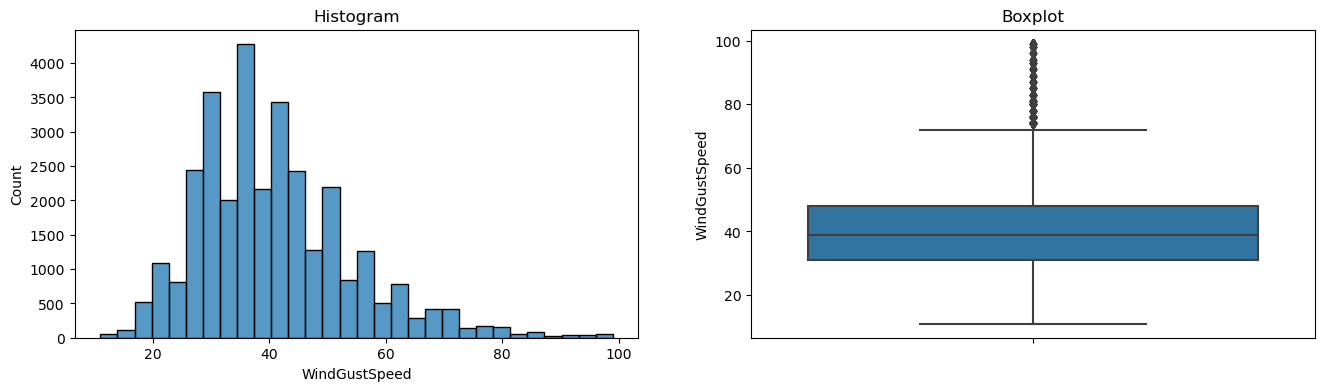

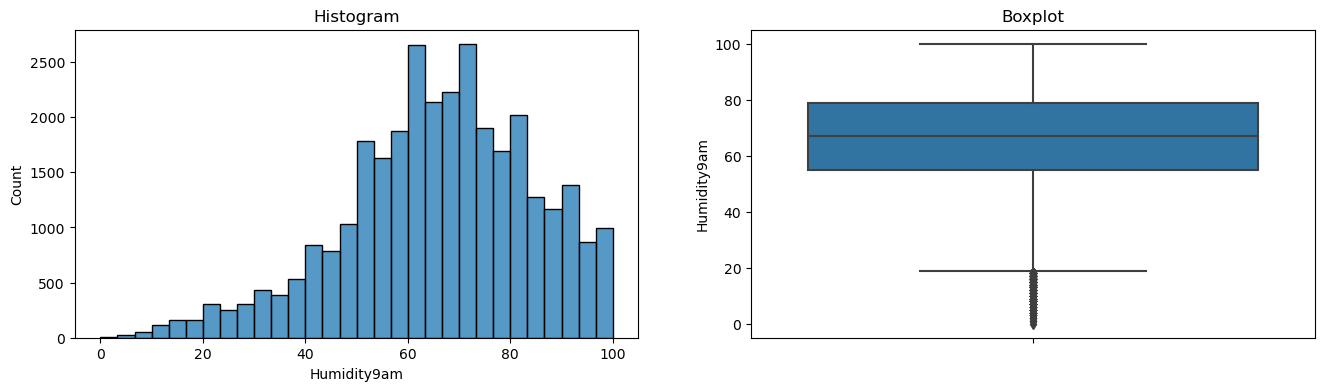

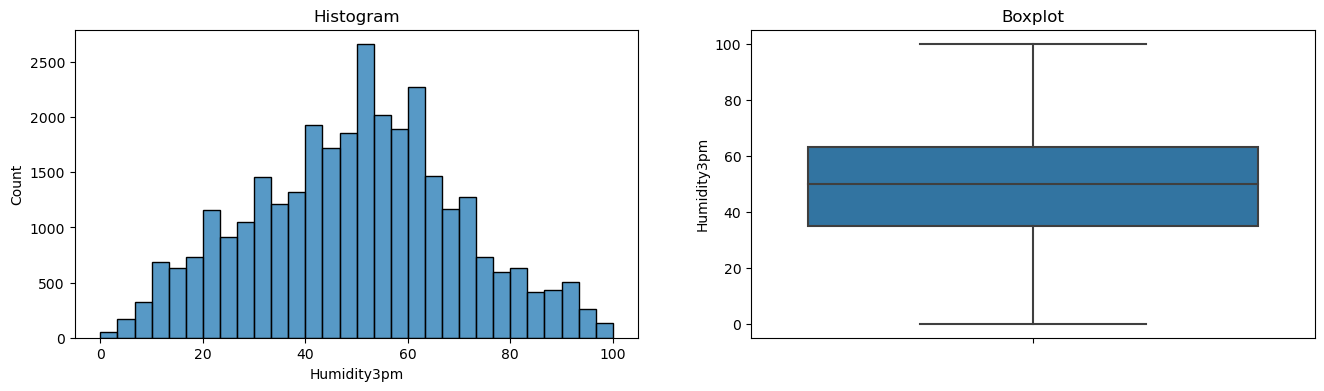

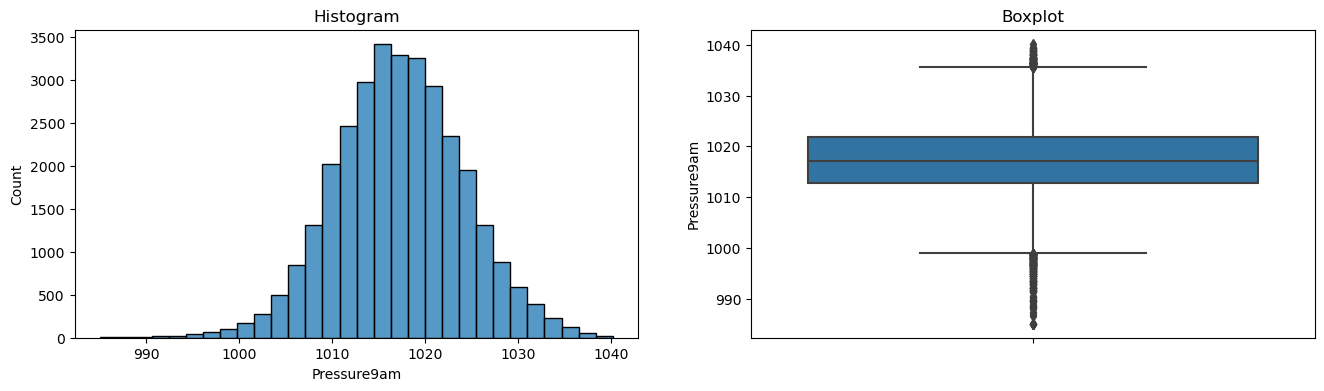

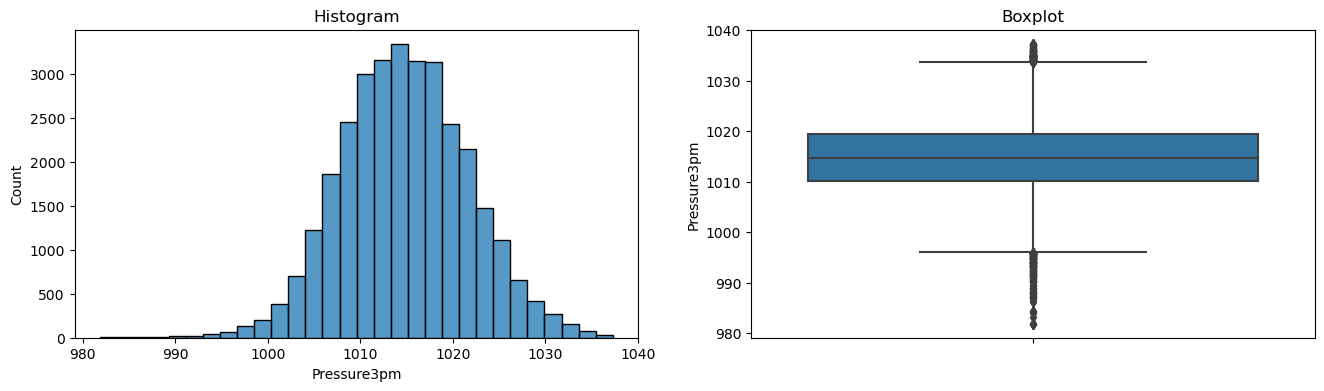

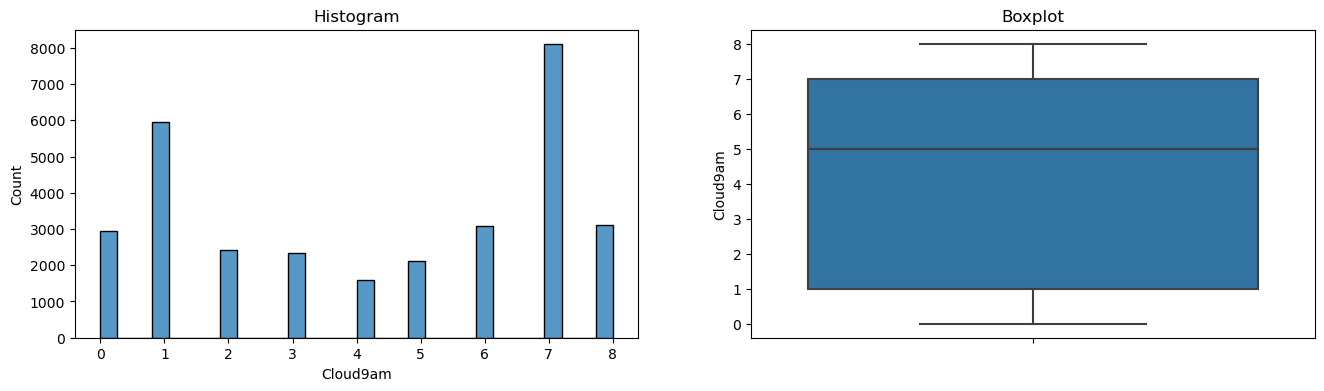

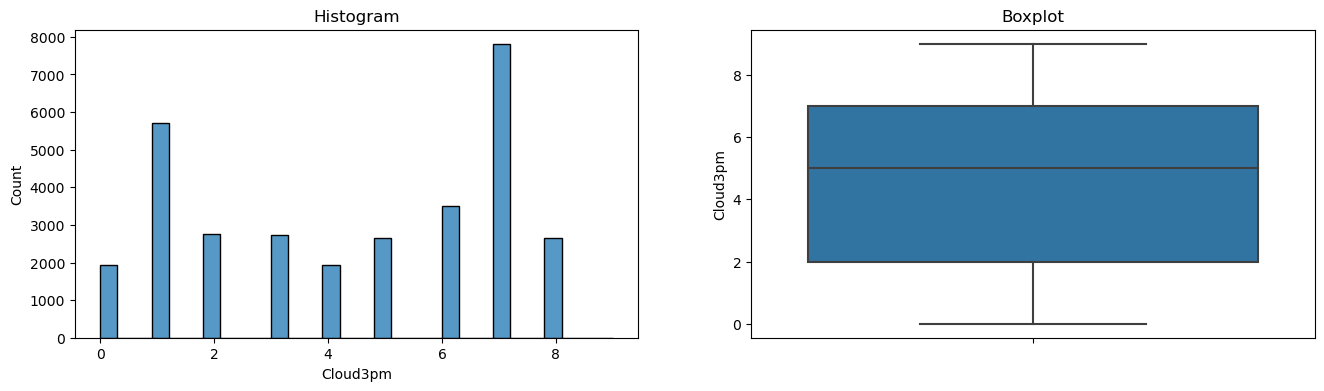

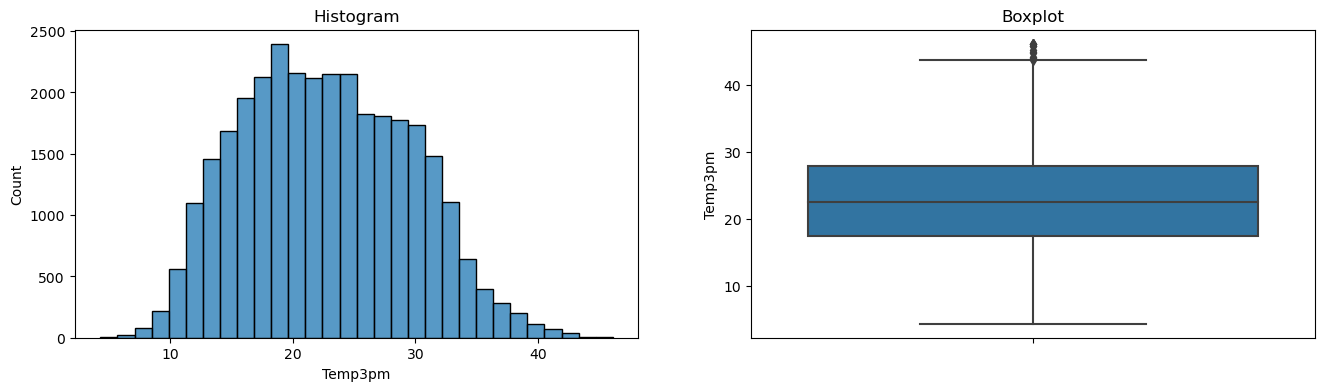

In [97]:
# Visualize after handling outlier

diagnostic_plots(X_train_capped, 'MaxTemp')
diagnostic_plots(X_train_capped, 'Rainfall')
diagnostic_plots(X_train_capped, 'Evaporation')
diagnostic_plots(X_train_capped, 'Sunshine')
diagnostic_plots(X_train_capped, 'WindGustSpeed')
diagnostic_plots(X_train_capped, 'Humidity9am')
diagnostic_plots(X_train_capped, 'Humidity3pm')
diagnostic_plots(X_train_capped, 'Pressure9am')
diagnostic_plots(X_train_capped, 'Pressure3pm')
diagnostic_plots(X_train_capped, 'Cloud9am')
diagnostic_plots(X_train_capped, 'Cloud3pm')
diagnostic_plots(X_train_capped, 'Temp3pm')

### 6.4.2 - Handling Duplicated Data

In [98]:
# Show duplicate
X_train.duplicated().sum()

0

There is no duplicated data

### 6.4.3 - Handling Missing Values

In [99]:
X_train.isna().sum()

Location         0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp3pm          0
RainToday        0
dtype: int64

There is no missing values

## 6.5 - Dividing feature (X) in Train-set and Test-set into categorical and numeric columns

In [100]:
# Get Numeric columns
num_col = ['MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
             'WindGustSpeed', 'Humidity9am','Humidity3pm',
             'Pressure9am','Pressure3pm', 'Cloud9am', 'Cloud3pm',
             'Temp3pm']

# Get Category columns
cat_col = ['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday']

In [101]:
# Feature train-set (X_train)
X_train_num = X_train_capped[num_col]
X_train_cat = X_train[cat_col]

# Feature test-set (X_test)
X_test_num = X_test_capped[num_col]
X_test_cat = X_test[cat_col]

# Show in feature train-set
display(X_train_num.head())
display(X_train_cat.head())

# Show in feature test-set)
display(X_test_num.head())
display(X_test_cat.head())

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm
48919,24.2,0.0,3.0,5.7,54.0,70.0,31.0,1015.0,1008.6,7.0,7.0,23.2
23949,18.0,2.4,3.8,9.0,35.0,61.0,52.0,1012.9,1011.3,7.0,6.0,17.6
54703,13.0,0.2,1.6,3.0,31.0,89.0,77.0,1028.4,1028.5,3.0,6.0,12.2
59466,27.5,0.0,4.8,8.5,15.0,77.0,45.0,1020.4,1017.0,3.0,3.0,25.6
24519,30.0,0.0,10.4,12.2,50.0,61.0,48.0,1020.0,1018.9,2.0,2.0,28.2


,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
48919,Mildura,NE,NE,NE,No
23949,SydneyAirport,SSE,SE,SSE,Yes
54703,Watsonia,WSW,WSW,SW,No
59466,Brisbane,NE,SW,NE,No
24519,SydneyAirport,ENE,NNE,ENE,No


,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm
72669,18.2,2.4,1.8,7.0,63.0,73.0,74.0,1013.1,1012.6,6.0,6.0,14.5
42392,16.7,2.0,1.4,3.8,44.0,81.0,75.0,1019.7,1018.0,6.0,6.0,14.4
82346,30.9,0.0,10.6,13.3,57.0,45.0,22.0,1013.9,1010.7,1.0,0.0,30.6
31118,27.5,0.0,7.4,11.7,35.0,69.0,40.0,1011.8,1007.4,7.0,2.0,26.8
94368,23.2,0.0,3.2,8.9,26.0,55.0,37.0,1022.4,1018.6,6.0,6.0,22.3


,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
72669,Woomera,WSW,WSW,SW,Yes
42392,Sale,WSW,W,W,Yes
82346,PerthAirport,ESE,ESE,SSE,No
31118,Canberra,NE,SSE,E,No
94368,AliceSprings,E,ENE,E,No


## 6.6 - Feature Transformation

### 6.6.1 - Feature Scaling

**Using MinMaxScaler Because the majority of data is `skewed`**

In [102]:
scaler = MinMaxScaler()

scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

display(X_train_num_scaled)

array([[0.41849148, 0.        , 0.14150943, ..., 0.875     , 0.77777778,
        0.45215311],
       [0.2676399 , 1.        , 0.17924528, ..., 0.875     , 0.66666667,
        0.31818182],
       [0.1459854 , 0.08333333, 0.0754717 , ..., 0.375     , 0.66666667,
        0.18899522],
       ...,
       [0.47445255, 0.        , 0.33018868, ..., 0.125     , 0.        ,
        0.47607656],
       [0.40632603, 1.        , 0.27358491, ..., 0.875     , 0.77777778,
        0.37799043],
       [0.10462287, 0.08333333, 0.08490566, ..., 0.875     , 0.77777778,
        0.15311005]])

### 6.6.2 - Feature Encoding

**Using OneHotEncoder Because there is `no hierarchy` between data**

In [103]:
encoder = OneHotEncoder(sparse=False)

encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

display(X_train_cat_encoded)

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

## 6.7 - Merge Data

In [104]:
# Concatenate Columns
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)

display(X_train_final)

array([[0.41849148, 0.        , 0.14150943, ..., 0.        , 1.        ,
        0.        ],
       [0.2676399 , 1.        , 0.17924528, ..., 0.        , 0.        ,
        1.        ],
       [0.1459854 , 0.08333333, 0.0754717 , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.47445255, 0.        , 0.33018868, ..., 0.        , 1.        ,
        0.        ],
       [0.40632603, 1.        , 0.27358491, ..., 1.        , 0.        ,
        1.        ],
       [0.10462287, 0.08333333, 0.08490566, ..., 0.        , 1.        ,
        0.        ]])

# 6. Model Definition

**Using All these model because it's fit for classification**

In [105]:
# Base line Model KNN
model_knn = KNeighborsClassifier()

In [106]:
# Baseline Model SVM
model_svm = SVC()

In [107]:
# Baseline Model Decision Tree
model_dt = DecisionTreeClassifier()

In [108]:
# Baseline Model Random Forest
model_rf = RandomForestClassifier()

In [109]:
# Baseline Model Ada Boost
model_boost = AdaBoostClassifier()

# 7. Model Training

## 7.1 - KNN

In [110]:
start_time = time.time()

# Training Model
model_knn.fit(X_train_final, y_train)

elapsed_time = time.time() - start_time
print(f'Time to run this cell: {elapsed_time} s')

Time to run this cell: 0.005001068115234375 s


F1 Score - Train Set  :  0.6355312893742125 

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92     24617
           1       0.78      0.54      0.64      7042

    accuracy                           0.86     31659
   macro avg       0.83      0.75      0.78     31659
weighted avg       0.86      0.86      0.85     31659
 

Confusion Matrix      : 
Time to run this cell: 2.809776782989502 s


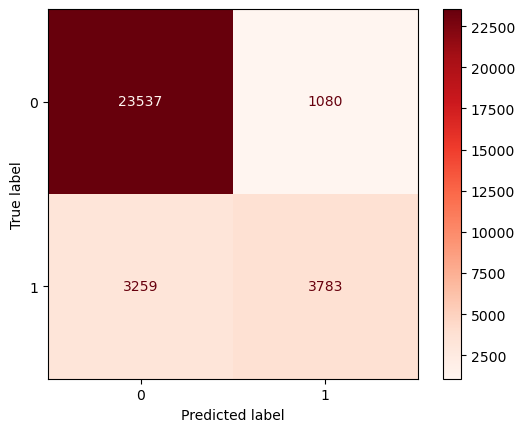

In [111]:
start_time = time.time()

# Check Performance Model against Train-Set

y_pred_train_knn = model_knn.predict(X_train_final)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_knn), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_knn), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_knn, X_train_final, y_train, cmap='Reds'))

elapsed_time = time.time() - start_time
print(f'Time to run this cell: {elapsed_time} s')

F1 Score - Test Set  :  0.4991590985536495 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      6155
           1       0.61      0.42      0.50      1760

    accuracy                           0.81      7915
   macro avg       0.73      0.67      0.69      7915
weighted avg       0.80      0.81      0.80      7915
 

Confusion Matrix      : 
Time to run this cell: 0.834632396697998 s


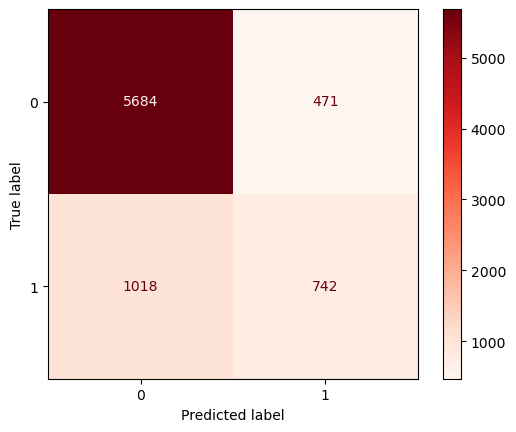

In [112]:
start_time = time.time()

# Check Performance Model against Test-Set

y_pred_test_knn = model_knn.predict(X_test_final)

print('F1 Score - Test Set  : ', f1_score(y_test, y_pred_test_knn), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_knn), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_knn, X_test_final, y_test, cmap='Reds'))

elapsed_time = time.time() - start_time
print(f'Time to run this cell: {elapsed_time} s')

## 7.2 - SVM

In [113]:
start_time = time.time()

# Training Model
model_svm.fit(X_train_final, y_train)

elapsed_time = time.time() - start_time
print(f'Time to run this cell: {elapsed_time} s')

Time to run this cell: 34.25583100318909 s


F1 Score - Train Set  :  0.6758713588146152 

Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93     24617
           1       0.83      0.57      0.68      7042

    accuracy                           0.88     31659
   macro avg       0.86      0.77      0.80     31659
weighted avg       0.87      0.88      0.87     31659
 

Confusion Matrix      : 
Time to run this cell: 63.890252351760864 s


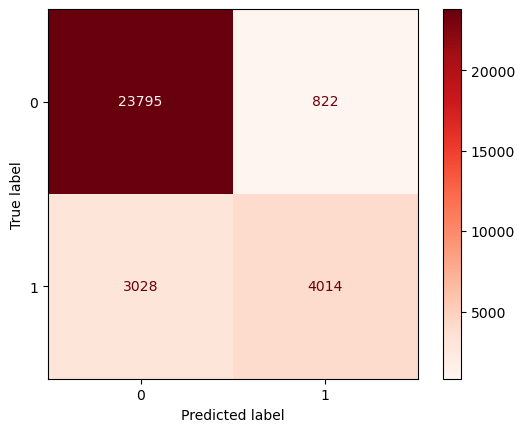

In [114]:
start_time = time.time()

# Check Performance Model against Train-Set

y_pred_train_svm = model_svm.predict(X_train_final)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_svm), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_svm), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_svm, X_train_final, y_train, cmap='Reds'))

elapsed_time = time.time() - start_time
print(f'Time to run this cell: {elapsed_time} s')

F1 Score - Test Set  :  0.6101464078992169 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      6155
           1       0.76      0.51      0.61      1760

    accuracy                           0.86      7915
   macro avg       0.82      0.73      0.76      7915
weighted avg       0.85      0.86      0.84      7915
 

Confusion Matrix      : 
Time to run this cell: 25.13358163833618 s


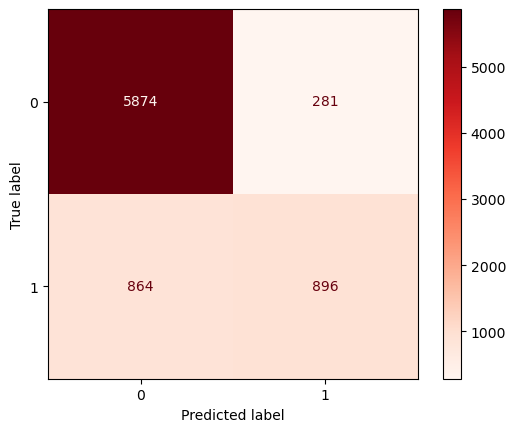

In [115]:
start_time = time.time()

# Check Performance Model against Test-Set

y_pred_test_svm = model_svm.predict(X_test_final)

print('F1 Score - Test Set  : ', f1_score(y_test, y_pred_test_svm), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_svm), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_svm, X_test_final, y_test, cmap='Reds'))

elapsed_time = time.time() - start_time
print(f'Time to run this cell: {elapsed_time} s')

## 7.3 - Decision Tree

In [116]:
start_time = time.time()

# Training Model
model_dt.fit(X_train_final, y_train)

elapsed_time = time.time() - start_time
print(f'Time to run this cell: {elapsed_time} s')

Time to run this cell: 0.77152419090271 s


F1 Score - Train Set  :  1.0 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24617
           1       1.00      1.00      1.00      7042

    accuracy                           1.00     31659
   macro avg       1.00      1.00      1.00     31659
weighted avg       1.00      1.00      1.00     31659
 

Confusion Matrix      : 
Time to run this cell: 0.12995648384094238 s


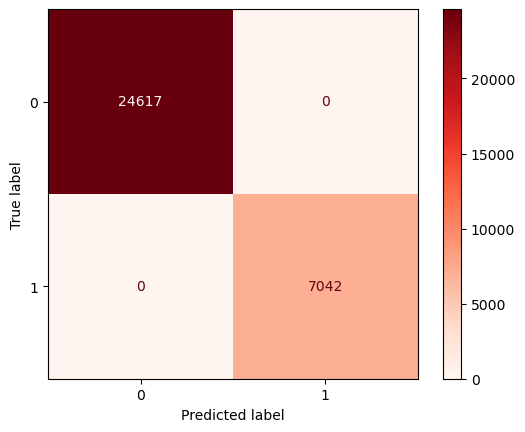

In [117]:
start_time = time.time()

# Check Performance Model against Train-Set

y_pred_train_dt = model_dt.predict(X_train_final)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_dt), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_dt), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_dt, X_train_final, y_train, cmap='Reds'))

elapsed_time = time.time() - start_time
print(f'Time to run this cell: {elapsed_time} s')

F1 Score - Test Set  :  0.5396205357142858 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      6155
           1       0.53      0.55      0.54      1760

    accuracy                           0.79      7915
   macro avg       0.70      0.71      0.70      7915
weighted avg       0.79      0.79      0.79      7915
 

Confusion Matrix      : 
Time to run this cell: 0.07310843467712402 s


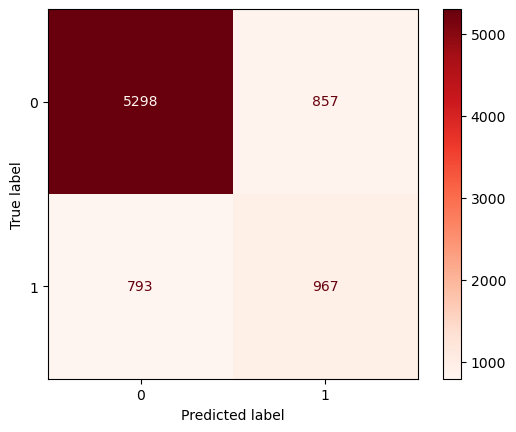

In [118]:
start_time = time.time()

# Check Performance Model against Test-Set

y_pred_test_dt = model_dt.predict(X_test_final)

print('F1 Score - Test Set  : ', f1_score(y_test, y_pred_test_dt), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_dt), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_dt, X_test_final, y_test, cmap='Reds'))

elapsed_time = time.time() - start_time
print(f'Time to run this cell: {elapsed_time} s')

## 7.4 - Random Forest

In [119]:
start_time = time.time()

# Training Model
model_rf.fit(X_train_final, y_train)

elapsed_time = time.time() - start_time
print(f'Time to run this cell: {elapsed_time} s')

Time to run this cell: 8.020515203475952 s


F1 Score - Train Set  :  1.0 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24617
           1       1.00      1.00      1.00      7042

    accuracy                           1.00     31659
   macro avg       1.00      1.00      1.00     31659
weighted avg       1.00      1.00      1.00     31659
 

Confusion Matrix      : 
Time to run this cell: 1.828216314315796 s


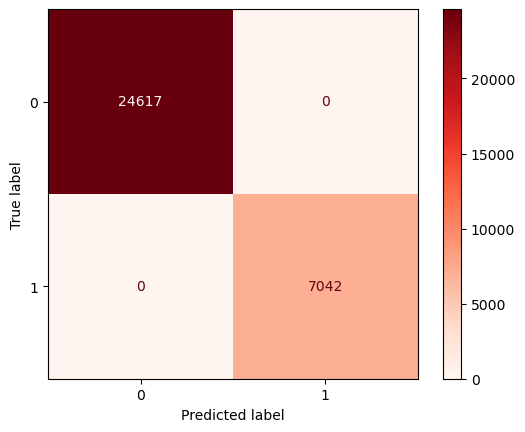

In [120]:
start_time = time.time()

# Check Performance Model against Train-Set

y_pred_train_rf = model_rf.predict(X_train_final)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_rf), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_rf), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_rf, X_train_final, y_train, cmap='Reds'))

elapsed_time = time.time() - start_time
print(f'Time to run this cell: {elapsed_time} s')

F1 Score - Test Set  :  0.6108273748723188 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      6155
           1       0.76      0.51      0.61      1760

    accuracy                           0.86      7915
   macro avg       0.82      0.73      0.76      7915
weighted avg       0.85      0.86      0.84      7915
 

Confusion Matrix      : 
Time to run this cell: 0.5350582599639893 s


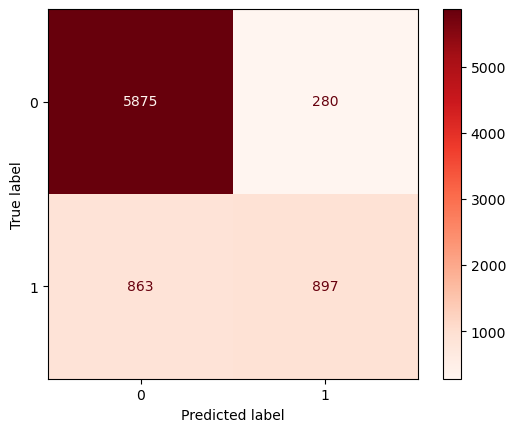

In [121]:
start_time = time.time()

# Check Performance Model against Test-Set

y_pred_test_rf = model_rf.predict(X_test_final)

print('F1 Score - Test Set  : ', f1_score(y_test, y_pred_test_rf), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_rf), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_rf, X_test_final, y_test, cmap='Reds'))

elapsed_time = time.time() - start_time
print(f'Time to run this cell: {elapsed_time} s')

## 7.5 - AdaBoost

In [122]:
start_time = time.time()

# Training Model
model_boost.fit(X_train_final, y_train)

elapsed_time = time.time() - start_time
print(f'Time to run this cell: {elapsed_time} s')

Time to run this cell: 2.909409523010254 s


F1 Score - Train Set  :  0.6215839146491589 

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91     24617
           1       0.74      0.54      0.62      7042

    accuracy                           0.85     31659
   macro avg       0.81      0.74      0.77     31659
weighted avg       0.85      0.85      0.85     31659
 

Confusion Matrix      : 
Time to run this cell: 1.07967209815979 s


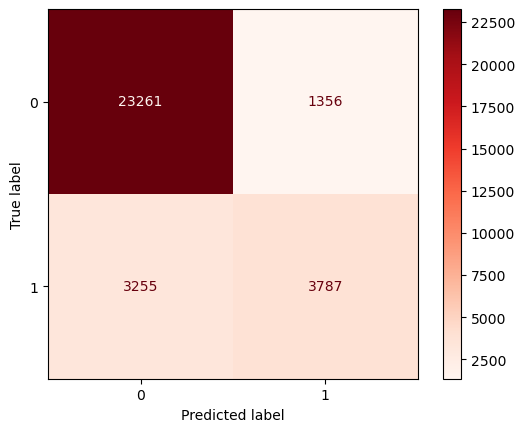

In [123]:
start_time = time.time()

# Check Performance Model against Train-Set

y_pred_train_boost = model_boost.predict(X_train_final)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_boost), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_boost), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_boost, X_train_final, y_train, cmap='Reds'))

elapsed_time = time.time() - start_time
print(f'Time to run this cell: {elapsed_time} s')

F1 Score - Test Set  :  0.6102246825138391 

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      6155
           1       0.71      0.53      0.61      1760

    accuracy                           0.85      7915
   macro avg       0.80      0.74      0.76      7915
weighted avg       0.84      0.85      0.84      7915
 

Confusion Matrix      : 
Time to run this cell: 0.27973389625549316 s


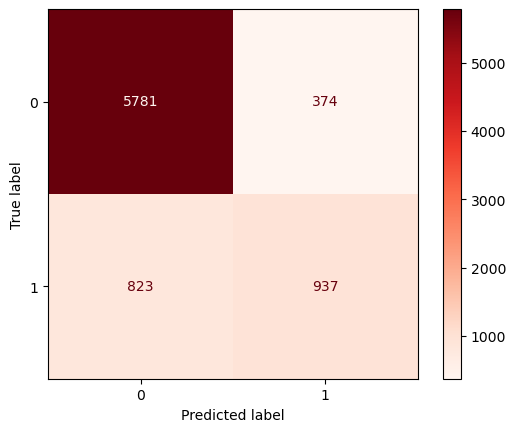

In [124]:
start_time = time.time()

# Check Performance Model against Test-Set

y_pred_test_boost = model_boost.predict(X_test_final)

print('F1 Score - Test Set  : ', f1_score(y_test, y_pred_test_boost), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_boost), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_boost, X_test_final, y_test, cmap='Reds'))

elapsed_time = time.time() - start_time
print(f'Time to run this cell: {elapsed_time} s')

## Conclusion

*In this case, I'am using metric evaluation `F1-Score` because I want to minimize or balance between `False Negative` and `False Positive`.*

From the five models above that get the best baseline models result seen from the result of the metric evaluation `F1-Score` are `Decision Tree` and `Random Forest`

## **Cross Validation Best Baseline Model**

Decision Tree

In [125]:
start_time = time.time()

f1_train_cross_val_dt = cross_val_score(model_dt,
                                     X_train_final,
                                     y_train,
                                     cv=5,
                                     scoring="f1")

print('Decision Tree :')
print('F1 Score - All - Cross Validation  : ', f1_train_cross_val_dt)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val_dt.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val_dt.std())
print('F1 Score - Range of Train-Set       : ', (f1_train_cross_val_dt.mean()-f1_train_cross_val_dt.std()) , '-', (f1_train_cross_val_dt.mean()+f1_train_cross_val_dt.std()))

elapsed_time = time.time() - start_time
print(f'Time to run this cell: {elapsed_time} s')

Decision Tree :
F1 Score - All - Cross Validation  :  [0.56199508 0.54366889 0.53730298 0.52384292 0.55310345]
F1 Score - Mean - Cross Validation :  0.5439826626824603
F1 Score - Std - Cross Validation  :  0.0130993282064656
F1 Score - Range of Train-Set       :  0.5308833344759947 - 0.557081990888926
Time to run this cell: 2.946368455886841 s


In [126]:
start_time = time.time()

f1_train_cross_val_dt = cross_val_score(model_dt,
                                     X_test_final,
                                     y_test,
                                     cv=5,
                                     scoring="f1")

print('Decision Tree :')
print('F1 Score - All - Cross Validation  : ', f1_train_cross_val_dt)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val_dt.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val_dt.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val_dt.mean()-f1_train_cross_val_dt.std()) , '-', (f1_train_cross_val_dt.mean()+f1_train_cross_val_dt.std()))

elapsed_time = time.time() - start_time
print(f'Time to run this cell: {elapsed_time} s')

Decision Tree :
F1 Score - All - Cross Validation  :  [0.52808989 0.54237288 0.5325779  0.54341737 0.53089888]
F1 Score - Mean - Cross Validation :  0.5354713832060749
F1 Score - Std - Cross Validation  :  0.006237561275176988
F1 Score - Range of Test-Set       :  0.529233821930898 - 0.5417089444812518
Time to run this cell: 0.7099063396453857 s


Random Forest

In [127]:
start_time = time.time()

f1_train_cross_val_rf = cross_val_score(model_rf,
                                     X_train_final,
                                     y_train,
                                     cv=5,
                                     scoring="f1")

print('Random Forest :')
print('F1 Score - All - Cross Validation  : ', f1_train_cross_val_rf)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val_rf.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val_rf.std())
print('F1 Score - Range of Train-Set       : ', (f1_train_cross_val_rf.mean()-f1_train_cross_val_rf.std()) , '-', (f1_train_cross_val_rf.mean()+f1_train_cross_val_rf.std()))

elapsed_time = time.time() - start_time
print(f'Time to run this cell: {elapsed_time} s')

Random Forest :
F1 Score - All - Cross Validation  :  [0.61146497 0.62334331 0.61429759 0.6066838  0.62013536]
F1 Score - Mean - Cross Validation :  0.6151850070073382
F1 Score - Std - Cross Validation  :  0.005965912612247815
F1 Score - Range of Train-Set       :  0.6092190943950905 - 0.621150919619586
Time to run this cell: 33.49349522590637 s


In [128]:
start_time = time.time()

f1_test_cross_val_rf = cross_val_score(model_rf,
                                     X_test_final,
                                     y_test,
                                     cv=5,
                                     scoring="f1")

print('Random Forest :')
print('F1 Score - All - Cross Validation  : ', f1_test_cross_val_rf)
print('F1 Score - Mean - Cross Validation : ', f1_test_cross_val_rf.mean())
print('F1 Score - Std - Cross Validation  : ', f1_test_cross_val_rf.std())
print('F1 Score - Range of Test-Set       : ', (f1_test_cross_val_rf.mean()-f1_test_cross_val_rf.std()) , '-', (f1_test_cross_val_rf.mean()+f1_test_cross_val_rf.std()))

elapsed_time = time.time() - start_time
print(f'Time to run this cell: {elapsed_time} s')

Random Forest :
F1 Score - All - Cross Validation  :  [0.54991243 0.52972973 0.5754386  0.66450567 0.59375   ]
F1 Score - Mean - Cross Validation :  0.5826672866312205
F1 Score - Std - Cross Validation  :  0.04636349252703084
F1 Score - Range of Test-Set       :  0.5363037941041896 - 0.6290307791582513
Time to run this cell: 8.422436714172363 s


**Insight**

After obtaining the best base line model is `Decision Tree` and `Random Forest`, I check again whether it is the best result or just a coincidence or not, so I use cross validation to check it. and from here I get the conclusion that the `Decision Tree` model is still `underfit` and the `Random Forest` model is better than the `Decision tree` model.


# 8. Model Improvement

**Improving model `Random Forest`**

In [129]:
# start_time = time.time()

# param_grid_rf = {
#     'n_estimators': [50, 100, 200],  
#     'max_depth':[None, 10, 20],  
#     'min_samples_split': [2, 5, 10], 
#     'criterion' : ['gini', 'entropy', 'log_loss']
# }

# rf_gridcv = GridSearchCV(estimator=RandomForestClassifier(),
#                          param_grid=param_grid_rf,
#                          cv=5,
#                          n_jobs=-1,
#                          verbose=2,
#                          scoring='f1')

# rf_gridcv.fit(X_train_final, y_train)

# elapsed_time = time.time() - start_time
# print(f'Time to run this cell: {elapsed_time} s')

In [130]:
# # Get Best Hyperparameters

# rf_gridcv.best_params_

Best Random Forest model parameter:
 - `Criterion` : 'gini'
 - `max_depth` : None
 - `min_samples_split` : 2
 - `n_estimators` : 200

In [131]:
# Random Forest Best Parameter
best_param_rf = {
    'n_estimators' : 200,
    'max_depth' : 20,
    'min_samples_split' : 2,
    'criterion' : 'gini'}

numeric_transformer = Pipeline([
    ('scaler_n', MinMaxScaler())
])

categorical_transformer = Pipeline([
    ('encoder', OneHotEncoder())
])

# define preprocessing pipeline using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_col),
    ('cat', categorical_transformer, cat_col)
])

# Define the pipeline with preprocessing and classification steps
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(**best_param_rf))
])

# Fit pipeline into Train
pipeline.fit(X_train, y_train)

# Predict into Train
y_pred_train_pipe = pipeline.predict(X_train)
y_pred_train_pipe

# Predict into Test
y_pred_test_pipe = pipeline.predict(X_test)
y_pred_test_pipe

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

# 9. Model Evaluation

## 9.1 Baseline Model Random Forest

In [132]:
print('Train')
print(classification_report(y_train, y_pred_train_rf))
print('')

print('Test')
print(classification_report(y_test, y_pred_test_rf))

Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24617
           1       1.00      1.00      1.00      7042

    accuracy                           1.00     31659
   macro avg       1.00      1.00      1.00     31659
weighted avg       1.00      1.00      1.00     31659


Test
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6155
           1       0.76      0.51      0.61      1760

    accuracy                           0.86      7915
   macro avg       0.82      0.73      0.76      7915
weighted avg       0.85      0.86      0.84      7915



Confusion Matrix      : 


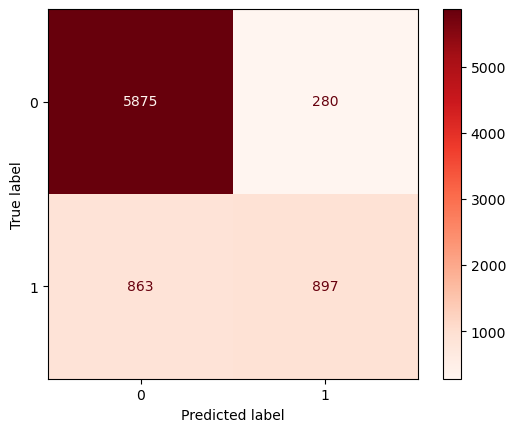

In [133]:
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_rf, X_test_final, y_test, cmap='Reds'))


Confusion Matrix Prediction model baseline `Random Forest`:
 - True Positive : 928 Data (Predicted Rain and Actually Rain)
 - Ture Negative : 5864 Data (Predicted Not Rain and Actually Not Rain)
 - False Positive : 291 Data (Predicted Rain but Actually Not Rain)
 - False Negative : 832 Data (Predicted Not Rain but Actually Rain)

## 9.2 - Improve Model Random Forest

In [134]:
print('Train')
print(classification_report(y_train, y_pred_train_pipe))
print('')

print('Test')
print(classification_report(y_test, y_pred_test_pipe))

Train
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     24617
           1       1.00      0.92      0.96      7042

    accuracy                           0.98     31659
   macro avg       0.99      0.96      0.97     31659
weighted avg       0.98      0.98      0.98     31659


Test
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      6155
           1       0.77      0.51      0.62      1760

    accuracy                           0.86      7915
   macro avg       0.82      0.73      0.76      7915
weighted avg       0.85      0.86      0.85      7915



Confusion Matrix      : 


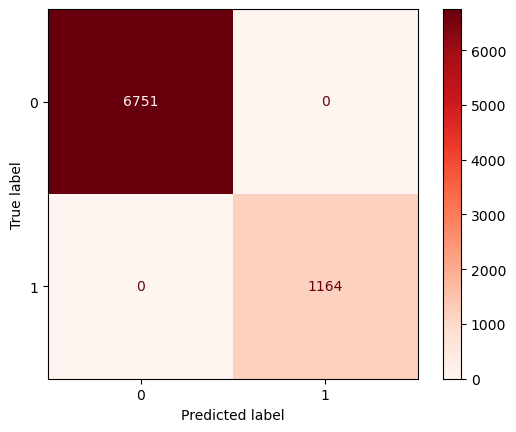

In [135]:
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_pred_test_pipe, cmap='Reds'))

Confusion Matrix Prediction model improve `Random Forest`:
    - True Positive : 1183 Data (Predicted Rain and Actually Rain)
    - Ture Negative : 6732 Data (Predicted Not Rain and Actually Not Rain)
    - False Positive : 0 Data (Predicted Rain but Actually Not Rain)
    - False Negative : 0 Data (Predicted Not Rain but Actually Rain)

### Conclusion

After improving the `Random Forest` model, although from the results of the Train-set and Tet-set there is no visible change, but in the confuion matrix there is a change, `False Negative` and `False positive` have been minimized and balanced. From there, the results of the model improvement can be seen.

# 10. Model Saving

In [136]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler_n',
                                                                   MinMaxScaler())]),
                                                  ['MaxTemp', 'Rainfall',
                                                   'Evaporation', 'Sunshine',
                                                   'WindGustSpeed',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Cloud9am', 'Cloud3pm',
                                                   'Temp3pm']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am', 'WindDir3pm',
                                                   'RainToday'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=20, n_estimators=200))])

In [137]:
with open ('pipeline.pkl', 'wb') as file_1:
    pickle.dump((pipeline), file_1)

# 11. Model Inference

Model Inference is in the folder `inference` with file name `P1M2_erlangga_jayadipraja_inf.ipynb`

# 12. Conclusion

From the beginning I have chosen to use the `F1-Score` evaluation metric, because in the case of predicting the weather we must minimize the `False Negative` and `False Positive` because, if there is a large `False Negative` condition (Predicted not to rain but it rains), people who believe in our prediction model will feel cheated and that is very bad in business, and so on the other hand if the `False Positive` condition is greater. However, we who have this model can also make a business strategy if the model predicts with very good results, such as the results of our predictions are correct then the business plan related to rainy conditions will be a very good thing.

# 13. Conceptual Problems

1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !

     Bagging atau bootstrap aggregation adalah metode ensemble yang melakukan training beberapa classifier secara terpisah (paralel). Hasil dari training klasifier klasifier ini kemudian dikombinasikan untuk menghasilkan prediksi akhir dari sistem.

2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

    Perbedaan random forest dan boosting adalah random forest akan menghasilkan model secara sendiri dan mengkombinasikan haslinya, sedangkan boosting menhasilkan model secara berurutan, dan setiap model akan mengevaluasi kesalahan yang dibuat oleh model sebelumnya

3. Jelaskan apa yang dimaksud dengan Cross Validation !

    Cross Validation adalah teknik untuk memperkirakan model pada data yang tidak terlihat. Cross Validation berguna untuk menghindari Overfitting.